In [1]:
import polarization as plr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Shared configuration for the simulation
num_agents = plr.NUM_AGENTS
num_bins = plr.NUM_BINS
max_time = 100

In [3]:
simulation = plr.run_simulation(
    plr.build_extreme_beliefs(num_agents),
    plr.build_inf_graph_2_groups_faint(num_agents, 0.7, 0.2),
    max_time,
    num_bins,
    plr.Update.CONFBIAS_SHARP,
    plr.CONFBIAS_DISCOUNT,
    plr.BACKFIRE_BELIEF_THRESHOLD,
    plr.BACKFIRE_INFLUENCE_THRESHOLD    
)

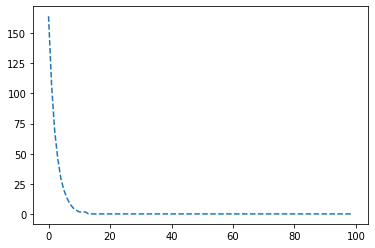

In [4]:
plt.plot(simulation[0], linestyle="dashed")

In [5]:
simulations = {update_type: plr.run_simulation(
    plr.build_extreme_beliefs(num_agents),
    plr.build_inf_graph_2_groups_faint(num_agents, 0.1, 0.5),
    max_time,
    num_bins,
    update_type,
    plr.CONFBIAS_DISCOUNT,
    plr.BACKFIRE_BELIEF_THRESHOLD,
    plr.BACKFIRE_INFLUENCE_THRESHOLD    
) for update_type in plr.Update}

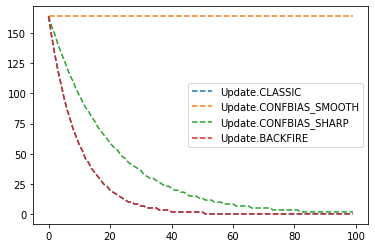

In [6]:
for update_type, values in simulations.items():
    plt.plot(values[0], linestyle="dashed", label=update_type)
plt.legend()

In [7]:
simulations2 = {update_type: plr.run_simulation(
    plr.build_mild_beliefs(num_agents, plr.LOW_POLE, plr.HIGH_POLE, plr.BELIEF_STEP),
    plr.build_inf_graph_2_groups_disconnected(num_agents, 0.5),
    150,
    num_bins,
    update_type,
    plr.CONFBIAS_DISCOUNT,
    plr.BACKFIRE_BELIEF_THRESHOLD,
    plr.BACKFIRE_INFLUENCE_THRESHOLD    
) for update_type in plr.Update}

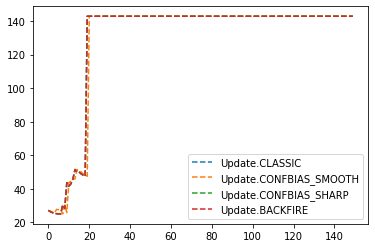

In [8]:
for update_type, values in simulations2.items():
    plt.plot(values[0], linestyle="dashed", label=update_type)
plt.legend()

In [9]:
sim = plr.run_simulation(
    plr.build_mild_beliefs(num_agents, plr.LOW_POLE, plr.HIGH_POLE, plr.BELIEF_STEP),
    plr.build_inf_graph_2_groups_disconnected(num_agents, 0.5),
    100,
    num_bins,
    plr.Update.BACKFIRE,
    plr.CONFBIAS_DISCOUNT,
    plr.BACKFIRE_BELIEF_THRESHOLD,
    plr.BACKFIRE_INFLUENCE_THRESHOLD    
)

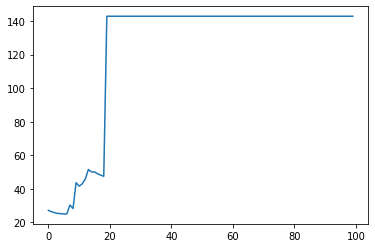

In [10]:
plt.plot(sim[0])

In [11]:
sim[0][99]

142.7825724343806

# Run Simulations

The default parameters are defined as constants in the `polarization.py` module.

- NUM_AGENTS = 100
- LOW_POLE = 0.25
- HIGH_POLE = 0.75
- CONSENSUS_VALUE = 0.5


- NUM_BINS = 201
- ALPHA = 1.6
- K = 1000


- CONFBIAS_DISCOUNT = 0.5
- BACKFIRE_BELIEF_THRESHOLD = 0.4
- BACKFIRE_INFLUENCE_THRESHOLD = 0.2


- CLIQUE_BELIEF_VALUE = 0.5


- GROUPS_DISCONNECTED_BELIEF_VALUE = 0.5


- GROUPS_FAINTLY_BELIEF_VALUE_STRONG = 0.5
- GROUPS_FAINTLY_BELIEF_VALUE_WEAK = 0.1


- INFLUENCERS_BALANCED_OUTGOING_BOTH = 0.6
- INFLUENCERS_BALANCED_INCOMING_BOTH = 0.0
- INFLUENCERS_BALANCED_OTHERS = 0.1


- INFLUENCERS_UNBALANCED_OUTGOING_FIRST = 0.8
- INFLUENCERS_UNBALANCED_OUTGOING_SECOND = 0.5
- INFLUENCERS_UNBALANCED_INCOMING_FIRST = 0.1
- INFLUENCERS_UNBALANCED_INCOMING_SECOND = 0.1
- INFLUENCERS_UNBALANCED_OTHERS = 0.2


- CIRCULAR_BELIEF_VALUE = 0.5


In [12]:
pol_history, belief_history = plr.run_simulation(
    plr.build_belief(plr.Belief.MILD),
    plr.build_influence(plr.Influence.GROUP_2_FAINT),
    100,
    num_bins,
    plr.Update.BACKFIRE,
    plr.CONFBIAS_DISCOUNT,
    plr.BACKFIRE_BELIEF_THRESHOLD,
    plr.BACKFIRE_INFLUENCE_THRESHOLD
)

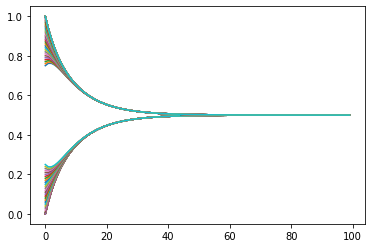

In [13]:
plt.plot(belief_history)
plt.show()

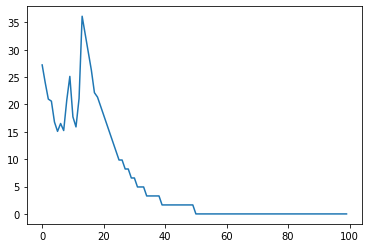

In [14]:
plt.plot(pol_history)

In [15]:
sum(1 if agent > 0.5 else 0 for agent in plr.build_belief(plr.Belief.MILD, 101))

50

In [16]:
num_agents = 3
pol_history, belief_history, _ = plr.run_till_convergence(
    plr.build_belief(plr.Belief.MILD, num_agents, step=0.06),
    plr.build_influence(plr.Influence.CLIQUE, num_agents, general_belief=0.1),
    update_type=plr.Update.CLASSIC
)

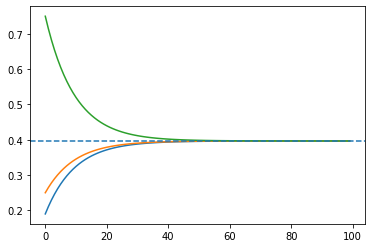

In [17]:
plt.plot(belief_history)
plt.axhline(np.mean(belief_history[0]), linestyle="dashed")
plt.show()

In [18]:
(np.mean(belief_history[0]), max(belief_history[-1]))

(0.39666666666666667, 0.39667709447511906)

In [19]:
import random
num_agents = 5
inf = np.array([[random.random() if random.random() > 0.9 else 0.0 for _ in range(num_agents)] for _ in range(num_agents)])
# inf[0][-4] = 0.0
pol_history, belief_history, _ = plr.Simulation(
    plr.build_belief(plr.Belief.MILD, num_agents),
    inf # Classic Update by default
).run()

In [20]:
from scipy.sparse.csgraph import connected_components

n_components, labels = connected_components(csgraph=inf, connection="weak")
n_components

2

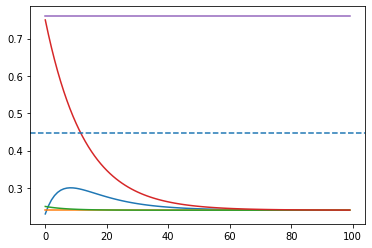

In [21]:
plt.plot(belief_history)
plt.axhline(np.mean(belief_history[0]), linestyle="dashed")
plt.show()

In [22]:
import math
def time_to_converge(epsilon, diff, inf):
    return math.log(epsilon/diff) / math.log(1-inf)

In [23]:
num_agents = 9
pol_history, belief_history, _ = plr.Simulation(
    plr.build_belief(plr.Belief.MILD, num_agents),
    plr.build_influence(plr.Influence.CLIQUE, num_agents) # Classic Update by default
).run()

In [24]:
epsilon = 0.1
t = time_to_converge(epsilon, max(belief_history[0]) - min(belief_history[0]), 0.5)
max(belief_history[2]) - min(belief_history[2])

0.14250000000000002

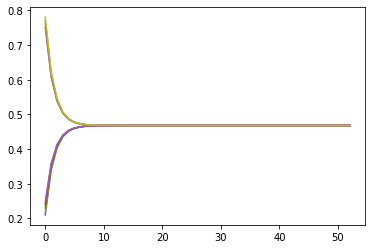

In [25]:
plt.plot(belief_history)
plt.show()

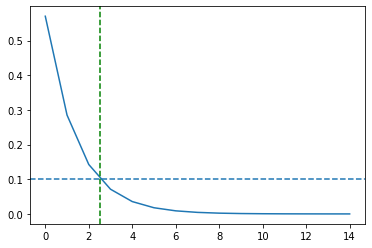

In [26]:
plt.plot([max(belief_step) - min(belief_step) for belief_step in belief_history[:15]])
plt.axhline(epsilon, linestyle="dashed")
plt.axvline(t, color="g", linestyle="dashed")
plt.show()

In [27]:
i = 0.5
inf = np.array([
    [0, 0, 0, i, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, i, i, 0, 0, 0, 0, 0, 0, 0],
    [0, i, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, i, 0, 0, 0, 0, 0],
    [0, 0, 0, i, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, i, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, i, 0, 0, i, 0, 0, 0],
    [0, 0, 0, 0, i, 0, i, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, i, i],
    [0, 0, 0, 0, 0, 0, 0, 0, i, 0, i],
    [0, 0, 0, 0, 0, 0, 0, 0, i, i, 0]
])
pol_history, belief_history, _ = plr.Simulation(plr.build_belief(plr.Belief.UNIFORM, len(inf)), inf).run()

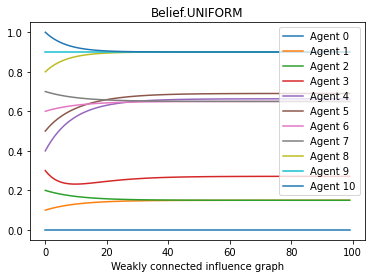

In [28]:
plt.plot(belief_history[:100])
# plt.axhline(np.mean(belief_history[0]), linestyle="dashed")
plt.title(plr.Belief.UNIFORM)
plt.xlabel("Weakly connected influence graph")
plt.legend(["Agent {}".format(i) for i, _ in enumerate(inf)])
plt.show()

In [29]:
i = 0.5
inf = np.array([
    [0, 0, 0, i, 0, 0, 0, 0, 0, 0],
    [0, 0, i, i, 0, 0, 0, 0, 0, 0],
    [0, i, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, i, 0, 0, 0, 0],
    [0, 0, 0, i, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, i, 0, 0, 0, i, i],
    [0, 0, 0, 0, i, 0, 0, i, 0, 0],
    [0, 0, 0, 0, i, 0, i, 0, 0, 0],
    [0, 0, 0, 0, 0, i, 0, 0, 0, i],
    [0, 0, 0, 0, 0, i, 0, 0, i, 0]
])
pol_history, belief_history, _ = plr.Simulation(plr.build_belief(plr.Belief.UNIFORM, len(inf)), inf, num_bins=100).run(750)

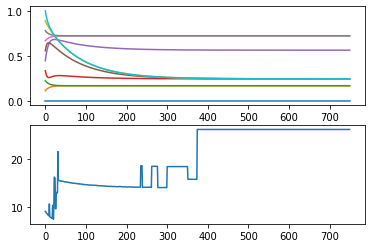

In [30]:
plt.subplot(2, 1, 1)
plt.plot(belief_history)
plt.subplot(2, 1, 2)
plt.plot(pol_history)
plt.show()

In [31]:
pol_history, belief_history, _ = plr.Simulation(
    plr.build_belief(plr.Belief.UNIFORM, 6),
    plr.build_influence(plr.Influence.CIRCULAR, 6)
).run(150)

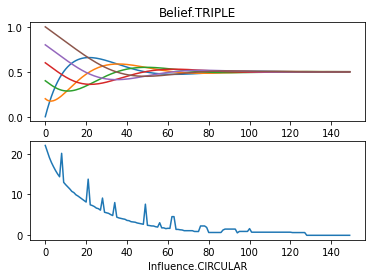

In [32]:
plt.subplot(2,1,1)
plt.plot(belief_history)
# plt.axhline(np.mean(belief_history[0]), linestyle="dashed")
plt.title(plr.Belief.TRIPLE)
# plt.legend(["Agent {}".format(i) for i in range(6)])

plt.subplot(2,1,2)
plt.plot(pol_history)
plt.xlabel(plr.Influence.CIRCULAR)

plt.show()

In [34]:
num_agents = 24
pol_history, belief_history, _ = plr.Simulation(
    plr.build_belief(plr.Belief.UNIFORM, num_agents),
    plr.build_influence(plr.Influence.CIRCULAR, num_agents)
).run(500)

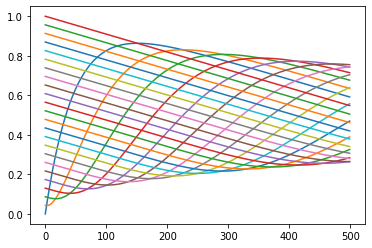

In [35]:
plt.plot(belief_history)
plt.show()

In [54]:
simulations = [{
    "sim": plr.Simulation(plr.build_belief(blf), plr.build_influence(inf)),
    "blf": blf,
    "inf": inf } for inf in plr.Influence for blf in plr.Belief
]

In [55]:
import cli_utils as cli

for i in cli.ProgressRange(len(simulations), "running"):
    n_times = 100
    if simulations[i]["inf"] == plr.Influence.CIRCULAR:
        n_times = 500
    simulations[i]["sim"] = simulations[i]["sim"].run(n_times, smart_stop=False)

Progress: [====================] 30/30 Done      


In [102]:
circulars = [{
    "sim": plr.Simulation(plr.build_belief(blf, 6), plr.build_influence(plr.Influence.CIRCULAR, 6)),
    "blf": blf,
    "inf": plr.Influence.CIRCULAR }  for blf in plr.Belief
]

In [103]:
for i in cli.ProgressRange(len(circulars), "running"):
   circulars[i]["sim"] = circulars[i]["sim"].run(200, False)

Progress: [====================] 5/5 Done      


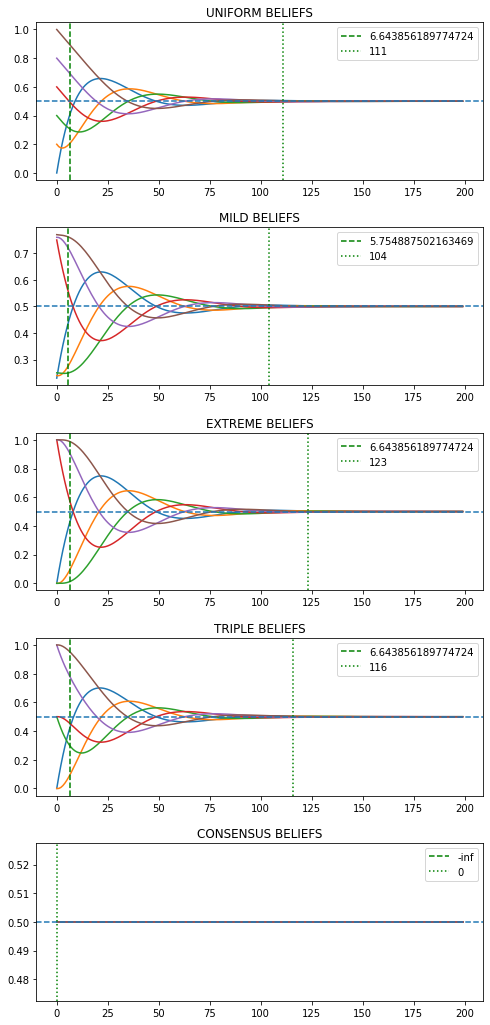

In [119]:
plt.figure(num=1, figsize=(8,18))
plt.subplots_adjust(hspace=0.3)
for i, blf in enumerate(plr.Belief):
    plt.subplot(len(plr.Belief), 1, i+1)
    for sim in circulars:
        if sim["blf"] == blf:
            plt.plot(sim["sim"][1])
            plt.axhline(np.mean(sim["sim"][1][0]), linestyle="dashed")
            t_i = time_to_converge(0.01, max(sim["sim"][1][0]) - min(sim["sim"][1][0]), 0.5)
            plt.axvline(t_i, color="g", linestyle="dashed", label="{}".format(t_i))
            for t_i, snap in enumerate(sim["sim"][1]):
                if max(snap) - min(snap) <= 0.01:
                    plt.axvline(t_i, color="g", linestyle="dotted", label="{}".format(t_i))
                    break
            plt.legend()
    plt.title("{} BELIEFS".format(blf.name))
plt.show()

In [41]:
plt_hist, blf_hist, _ = plr.Simulation(
    plr.build_belief(plr.Belief.MILD, 3, step=0.1),
    plr.build_influence(plr.Influence.CLIQUE, 3, general_belief=0.3)
).run(500)

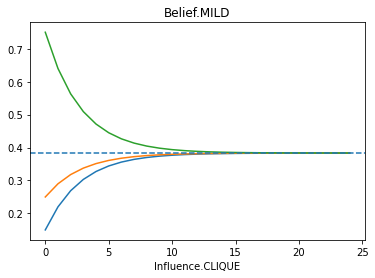

In [42]:
plt.plot(blf_hist[:25])
plt.title(plr.Belief.MILD)
plt.xlabel(plr.Influence.CLIQUE)
plt.axhline(np.mean(blf_hist[0]), linestyle="dashed")
plt.show()

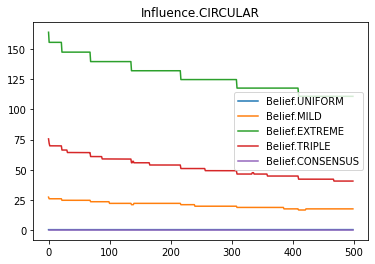

In [45]:
for sim in circulars:
    plt.plot(sim["sim"][0], label=sim["blf"])
plt.legend()
plt.title(plr.Influence.CIRCULAR)
plt.show()

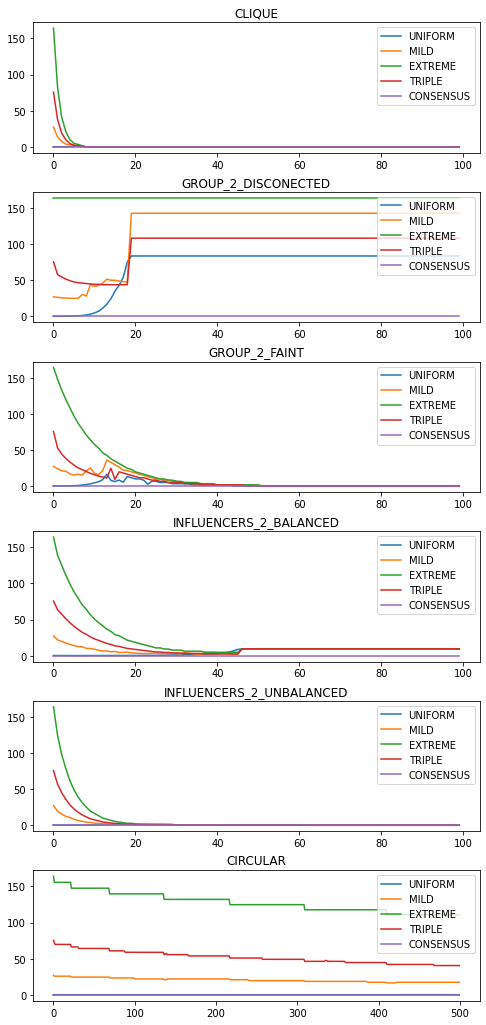

In [62]:
plt.figure(num=1, figsize=(8,18))
plt.subplots_adjust(hspace=0.3)
for i, inf in enumerate(plr.Influence):
    plt.subplot(len(plr.Influence), 1, i+1)
    for sim in simulations:
        if sim["inf"] == inf:
            plt.plot(sim["sim"][0], label=sim["blf"].name)
    plt.title(inf.name)
    plt.legend(loc="upper right")
plt.show()

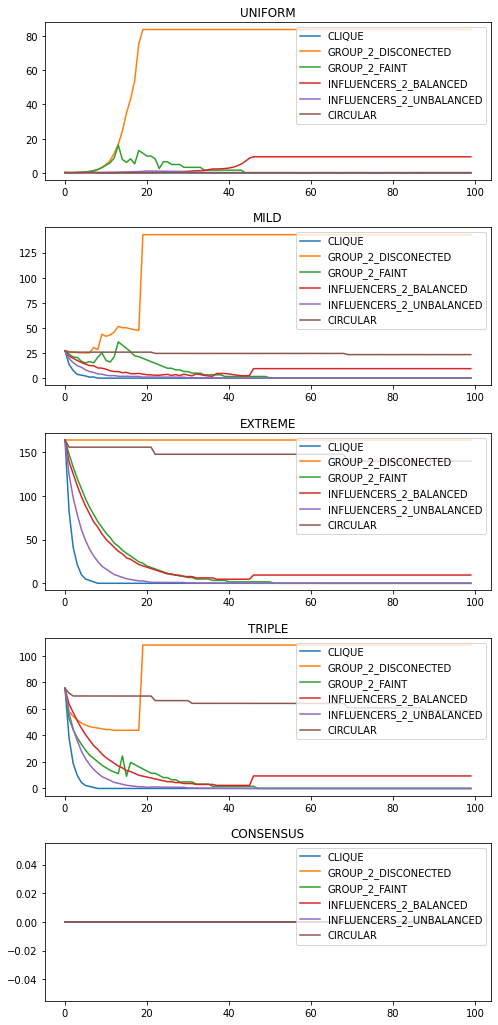

In [100]:
plt.figure(num=1, figsize=(8,18))
plt.subplots_adjust(hspace=0.3)
for i, blf in enumerate(plr.Belief):
    plt.subplot(len(plr.Belief), 1, i+1)
    for sim in simulations:
        if sim["blf"] == blf:
            plt.plot(sim["sim"][0][:100], label=sim["inf"].name)
    plt.title(blf.name)
    plt.legend(loc="upper right")
plt.show()

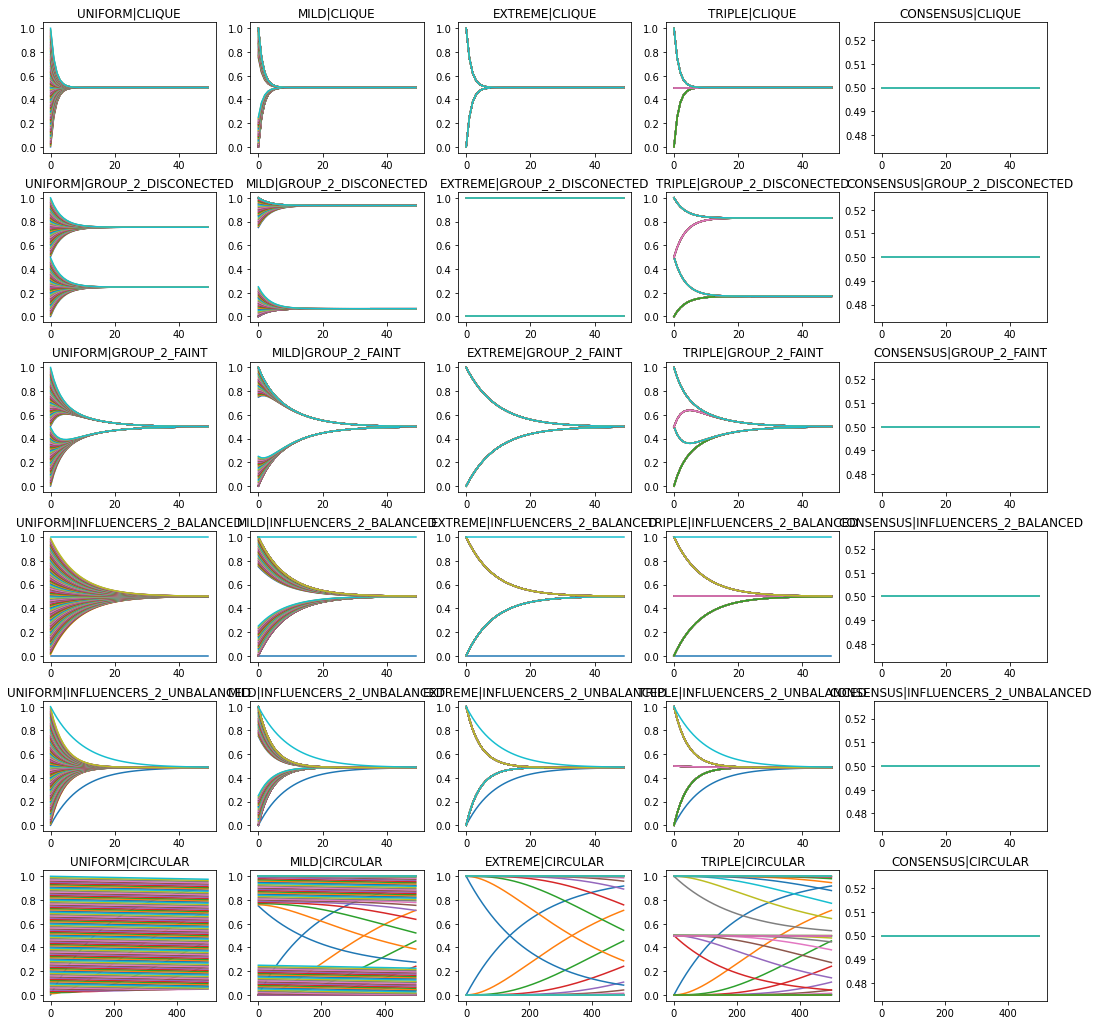

In [78]:
plt.figure(num=1, figsize=(18,18))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
for i, inf in enumerate(plr.Influence):
    for j, blf in enumerate(plr.Belief):
        plt.subplot(len(plr.Influence), len(plr.Belief), i * len(plr.Belief) + j + 1)
        for sim in simulations:
            if sim["inf"] == inf and sim["blf"] == blf:
                if inf is plr.Influence.CIRCULAR:
                    plt.plot(sim["sim"][1])
                else:
                    plt.plot(sim["sim"][1][:50])
                plt.title("{}|{}".format(sim["blf"].name, sim["inf"].name))
plt.show()

In [95]:
def circular_unbalance(size, min_val=0.2, max_val=0.8):
    inf_graph = np.zeros((size, size))
    step = (max_val - min_val) / size
    for i in range(size-1):
        inf_graph[i, i+1] = (1 - i) * step
    inf_graph[-1, 0] = step
    return inf_graph

circulars_unbalance = [{
    "sim": plr.Simulation(plr.build_belief(blf, 6), circular_unbalance(6)),
    "blf": blf,
    "inf": plr.Influence.CIRCULAR }  for blf in plr.Belief
]

for i in cli.ProgressRange(len(circulars_unbalance), "running"):
   circulars_unbalance[i]["sim"] = circulars_unbalance[i]["sim"].run(200, False)

Progress: [====================] 5/5 Done      


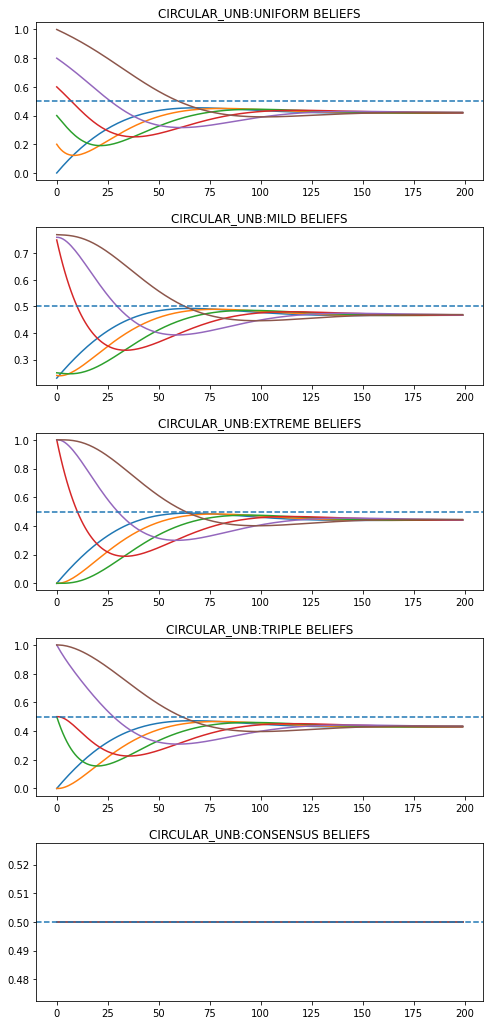

In [97]:
plt.figure(num=1, figsize=(8,18))
plt.subplots_adjust(hspace=0.3)
for i, blf in enumerate(plr.Belief):
    plt.subplot(len(plr.Belief), 1, i+1)
    for sim in circulars_unbalance:
        if sim["blf"] == blf:
            plt.plot(sim["sim"][1])
            plt.axhline(np.mean(sim["sim"][1][0]), linestyle="dashed")
    plt.title("CIRCULAR_UNB:{} BELIEFS".format(blf.name))
plt.show()